In [1]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"
%pip install pyscf
%pip install ffsim
%pip install qiskit_addon_sqd

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-00w7y_eb/qc-grader_fe8ce245ab394ef68ad126db82dfb745
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-00w7y_eb/qc-grader_fe8ce245ab394ef68ad126db82dfb745
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1d7a6915623b0cfeac4c114391c279e9d98eb7f9
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")


Qiskit version: 2.1.1
Grader version: 0.22.12


In [3]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'Y5wDjNuGer1keOHMzwkj_5UoHJud8RPTvfc_yZxqglHQ',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/0cbc0b1bde824777bfe56bd9c72ece9c:4e2e877c-d5e3-49a4-8dbd-902ac7733cef::',
  'verify': True,
  'private_endpoint': False}}

In [4]:
# Import common packages first
import numpy as np
from math import comb
import warnings
import pyscf
import matplotlib.pyplot as plt
import pickle
from functools import partial

# Import qiskit classes
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map
from qiskit_addon_sqd.fermion import SCIResult, diagonalize_fermionic_hamiltonian, solve_sci_batch

# Import qiskit ecosystems
import ffsim
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit_ibm_runtime import SamplerOptions

# Import grader
from qc_grader.challenges.qgss_2025 import (
    grade_lab3_ex1, 
    grade_lab3_ex2, 
    grade_lab3_ex3,
    grade_lab3_ex4,
    grade_lab3_ex5
)

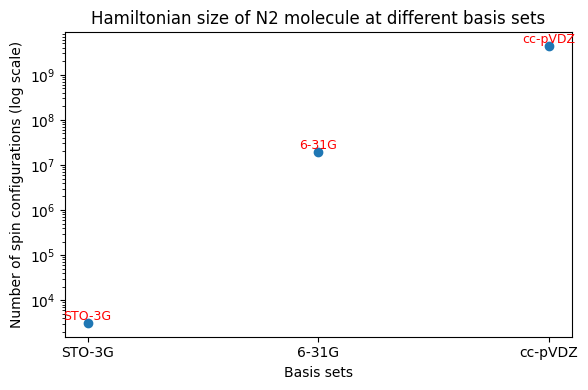

In [5]:
# Number of possible spin configurations
# Example: N2 molecule in STO-3G, 6-31G, and cc-pVDZ basis sets
# 14 electrons, 20 spin orbitals (from 10 spatial orbitals × 2)

# Calculate total electron configurations for each basis set
y1 = comb(8, 5) * comb(8, 5)       # STO-3G
y2 = comb(16, 5) * comb(16, 5)     # 6-31G
y3 = comb(26, 5) * comb(26, 5)     # cc-pVDZ

# Data
y = [y1, y2, y3]
x = list(range(len(y)))
labels = ['STO-3G', '6-31G', 'cc-pVDZ']

# Plot with logarithmic y-scale
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o')

plt.yscale('log')
plt.xticks(x, labels)
plt.xlabel('Basis sets')
plt.ylabel('Number of spin configurations (log scale)')
plt.title('Hamiltonian size of N2 molecule at different basis sets')

# Add labels above points
for i in range(len(x)):
    plt.text(x[i], y[i], f'{labels[i]}', fontsize=9, ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()


In [6]:
# Exercise 1: Number of possible spin configurations
# Example: O2 molecule in 6-31G basis
# 16 electrons, 20 spin orbitals (from 10 spatial orbitals × 2)

# Calculate all valid electron configurations
# Hint: This is a combinatorial problem. You can calculate by hand and provide the answer or use the math.comb() method below.

# ---- TODO : Task 1 ---
### Provide your code below to calculate the total configurations
from math import comb
α_config =  comb(16, 7)
β_config =  comb(16, 5)
total_config = (α_config)*(β_config)
# --- End of TODO ---

print(f"Total physical configurations for O2 in the given basis : {α_config:} x {β_config:} = {total_config}")


Total physical configurations for O2 in the given basis : 11440 x 4368 = 49969920


In [7]:
# Submit your answer using following code

grade_lab3_ex1(total_config) # Expected result type: integer

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Calculating log10 of configurations...


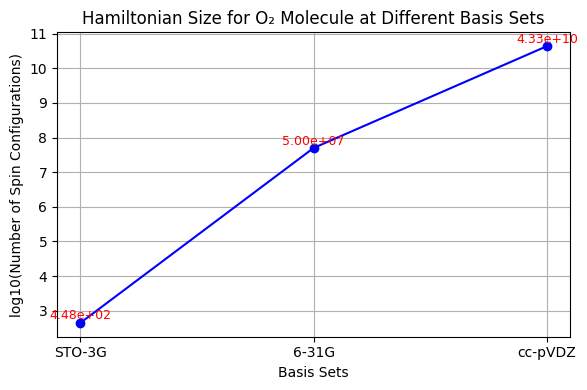

In [8]:
import matplotlib.pyplot as plt
from math import comb, log10

# Log-combined spin configuration counts to avoid large numbers
print("Calculating log10 of configurations...")

log_y1 = log10(comb(8, 7)) + log10(comb(8, 5))      # STO-3G
log_y2 = log10(comb(16, 7)) + log10(comb(16, 5))    # 6-31G
log_y3 = log10(comb(26, 7)) + log10(comb(26, 5))    # cc-pVDZ

# Data
y = [log_y1, log_y2, log_y3]  # Already in log10
x = list(range(len(y)))
labels = ['STO-3G', '6-31G', 'cc-pVDZ']

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o-', color='blue')

plt.xticks(x, labels)
plt.xlabel('Basis Sets')
plt.ylabel('log10(Number of Spin Configurations)')
plt.title('Hamiltonian Size for O₂ Molecule at Different Basis Sets')

# Annotate points
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.1, f'{10**y[i]:.2e}', fontsize=9, ha='center', color='red')

plt.tight_layout()
plt.grid(True)
plt.show()


MAPPING

In [9]:
warnings.filterwarnings("ignore")

# Specify molecule properties
open_shell = False
spin_sq = 0

# Build N2 molecule
mol = pyscf.gto.Mole()
mol.build(
    atom=[["N", (0, 0, 0)], ["N", (1.0, 0, 0)]],
    basis="6-31g",
    symmetry="Dooh",
)

# Define active space
n_frozen = 2
active_space = range(n_frozen, mol.nao_nr())

# Get molecular integrals
scf = pyscf.scf.RHF(mol).run()
num_orbitals = len(active_space)
n_electrons = int(sum(scf.mo_occ[active_space]))
num_elec_a = (n_electrons + mol.spin) // 2
num_elec_b = (n_electrons - mol.spin) // 2
cas = pyscf.mcscf.CASCI(scf, num_orbitals, (num_elec_a, num_elec_b))
mo = cas.sort_mo(active_space, base=0)
hcore, nuclear_repulsion_energy = cas.get_h1cas(mo)
eri = pyscf.ao2mo.restore(1, cas.get_h2cas(mo), num_orbitals)

# Compute exact energy
exact_energy = cas.run().e_tot

converged SCF energy = -108.835236570774
CASCI E = -109.046671778080  E(CI) = -32.8155692383187  S^2 = 0.0000000


import warnings
warnings.filterwarnings("ignore")

from pyscf import gto, scf, mcscf, ao2mo, cc

# Step 1: Define the N₂ molecule
mol = gto.Mole()
mol.atom = [["N", (0.0, 0.0, 0.0)], ["N", (1.1, 0.0, 0.0)]]
mol.basis = "6-31g"
mol.symmetry = False
mol.build()

# Step 2: Run SCF (Hartree-Fock)
scf_calc = scf.RHF(mol).run()

# Step 3: Define active space - CORRECTED RANGE
n_frozen = 2
active_space = list(range(2, 6))  # [2, 3, 4, 5] - 4 active orbitals
num_orbitals = len(active_space)

# Step 4: Electron count in active space
n_electrons = int(sum(scf_calc.mo_occ[i] for i in active_space))
num_alpha = (n_electrons + mol.spin) // 2
num_beta = (n_electrons - mol.spin) // 2

# Step 5: CASCI calculation
cas = mcscf.CASCI(scf_calc, num_orbitals, (num_alpha, num_beta))
mo = cas.sort_mo(active_space)

# Step 6: Run CASCI
exact_energy = cas.run().e_tot

# Step 7: Output result
print(f"Exact CASCI energy for N₂: {exact_energy:.6f} Hartree")
print(f"Active space: {active_space} ({num_orbitals} orbitals)")
print(f"Active electrons: {n_electrons} ({num_alpha} alpha, {num_beta} beta)")

converged SCF energy = -108.835236570775
CASCI E = -109.046671778080  E(CI) = -32.8155692383187  S^2 = 0.0000000


In [10]:
# Get CCSD t2 amplitudes for initializing the ansatz
ccsd = pyscf.cc.CCSD(scf, frozen=[i for i in range(mol.nao_nr()) if i not in active_space]).run()
t1 = ccsd.t1
t2 = ccsd.t2

E(CCSD) = -109.0398256929733  E_corr = -0.2045891221988309


E(CCSD) = -109.0398256929734  E_corr = -0.2045891221988304


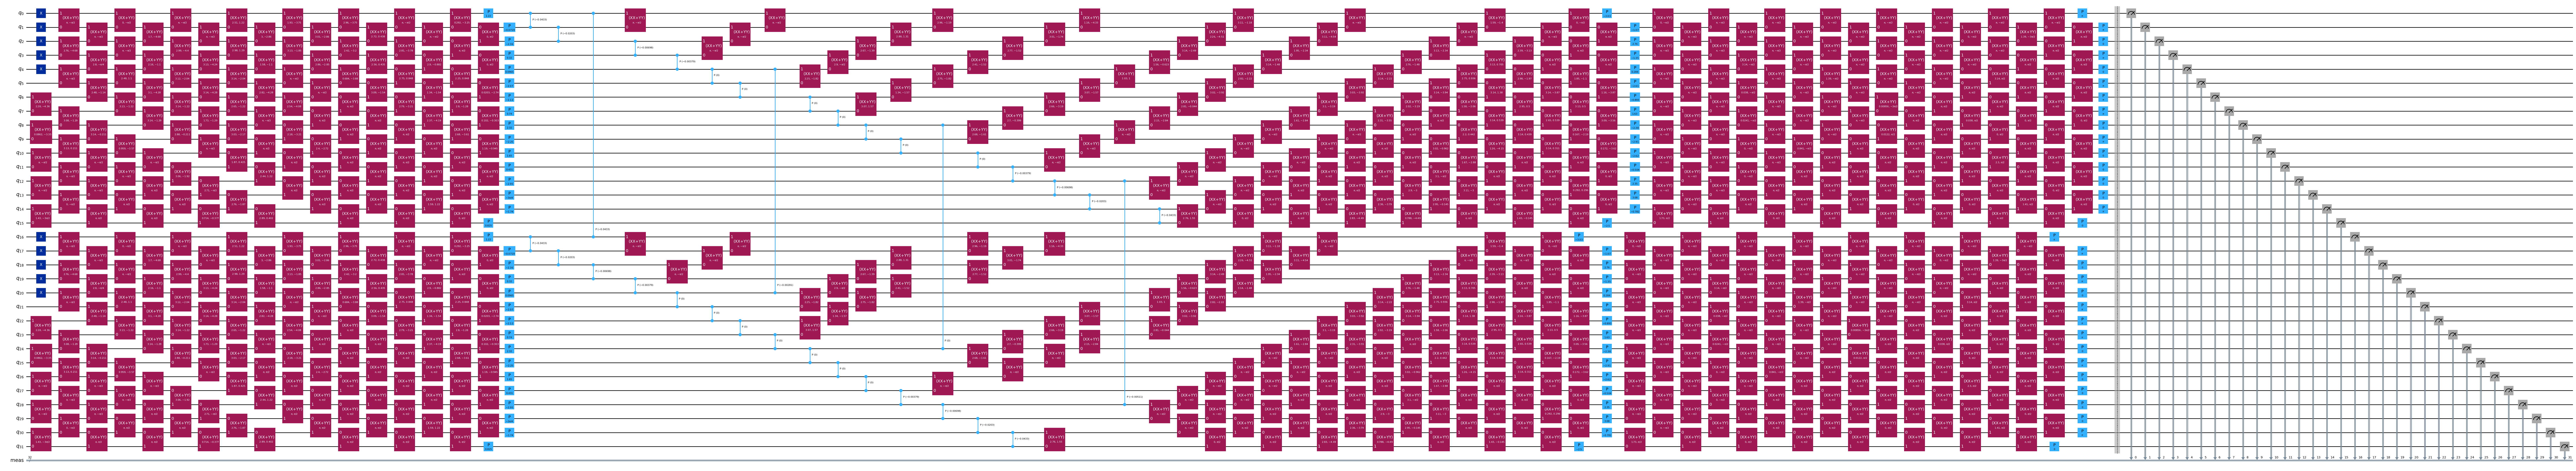

In [11]:
n_reps = 1
alpha_alpha_indices = [(p, p + 1) for p in range(num_orbitals - 1)]
alpha_beta_indices = [(p, p) for p in range(0, num_orbitals, 4)]

ucj_op = ffsim.UCJOpSpinBalanced.from_t_amplitudes(
    t2=t2,
    t1=t1,
    n_reps=n_reps,
    interaction_pairs=(alpha_alpha_indices, alpha_beta_indices),
)

nelec = (num_elec_a, num_elec_b)

# create an empty quantum circuit
qubits = QuantumRegister(2 * num_orbitals, name="q")
circuit = QuantumCircuit(qubits)

# prepare Hartree-Fock state as the reference state and append it to the quantum circuit
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(num_orbitals, nelec), qubits)

# apply the UCJ operator to the reference state
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)
circuit.measure_all()

circuit.decompose().decompose().draw("mpl", fold =-1)

In [12]:
# from qiskit_ibm_runtime import SamplerV2 as Sampler

# sampler = Sampler(mode=backend)
# job = sampler.run([isa_circuit], shots=10_000)
# primitive_result = job.result()
# pub_result = primitive_result[0]
# bit_array = pub_result.data.meas

bit_array = np.load('N2_device_bitarray.npy', allow_pickle=True).item()


In [13]:
%%time
# SQD options
energy_tol = 1e-3  
occupancies_tol = 1e-3 
max_iterations = 5

# Eigenstate solver options
num_batches = 5
samples_per_batch = 50
symmetrize_spin = True 
carryover_threshold = 1e-4 
max_cycle = 200
rng = np.random.default_rng(24)


# Pass options to the built-in eigensolver. If you just want to use the defaults,
# you can omit this step, in which case you would not specify the sci_solver argument
# in the call to diagonalize_fermionic_hamiltonian below.
sci_solver = partial(solve_sci_batch, spin_sq=0.0, max_cycle=max_cycle)


# List to capture intermediate results
result_history = [] 

def callback(results: list[SCIResult]): 
    result_history.append(results)
    iteration = len(result_history)
    print(f"Iteration {iteration}")
    for i, result in enumerate(results):
        print(f"\tSubsample {i}")
        print(f"\t\tEnergy: {result.energy + nuclear_repulsion_energy}")
        print(f"\t\tSubspace dimension: {np.prod(result.sci_state.amplitudes.shape)}")

result = diagonalize_fermionic_hamiltonian(
    hcore,
    eri,
    bit_array,
    samples_per_batch=samples_per_batch,
    norb=num_orbitals,
    nelec=nelec,
    num_batches=num_batches,
    energy_tol=energy_tol,
    occupancies_tol=occupancies_tol,
    max_iterations=max_iterations,
    sci_solver=sci_solver,
    symmetrize_spin=symmetrize_spin,
    carryover_threshold=carryover_threshold,
    callback=callback,
    seed=rng,
)

Iteration 1
	Subsample 0
		Energy: -106.27329013141697
		Subspace dimension: 10000
	Subsample 1
		Energy: -105.43810831755835
		Subspace dimension: 9801
	Subsample 2
		Energy: -106.63769425969386
		Subspace dimension: 10000
	Subsample 3
		Energy: -106.61258013830125
		Subspace dimension: 9801
	Subsample 4
		Energy: -106.63164450395635
		Subspace dimension: 9801
Iteration 2
	Subsample 0
		Energy: -107.91084907411818
		Subspace dimension: 9409
	Subsample 1
		Energy: -108.84006034736294
		Subspace dimension: 9604
	Subsample 2
		Energy: -108.84150457670017
		Subspace dimension: 10000
	Subsample 3
		Energy: -107.91290084871599
		Subspace dimension: 9409
	Subsample 4
		Energy: -108.84031227231542
		Subspace dimension: 9216
Iteration 3
	Subsample 0
		Energy: -108.89577578545783
		Subspace dimension: 12769
	Subsample 1
		Energy: -108.87738057039101
		Subspace dimension: 12769
	Subsample 2
		Energy: -108.88243139571688
		Subspace dimension: 12321
	Subsample 3
		Energy: -108.86232234859591
		Sub

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import csv, json

def save_and_plot_results(result_history, exact_energy, nuclear_repulsion_energy, save_prefix="sqd_output"):
    # Extract data
    min_e = [
        min(result, key=lambda res: res.energy).energy + nuclear_repulsion_energy
        for result in result_history
    ]
    e_diff = [abs(e - exact_energy) for e in min_e]
    occupancies = [np.sum(result.orbital_occupancies, axis=0) for result in result_history]
    avg_occupancy = np.mean(occupancies, axis=0)
    
    # Plot
    x1 = list(range(len(result_history)))
    yt1 = [1.0, 1e-1, 1e-2, 1e-3, 1e-4]
    chem_accuracy = 0.001

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Energy error plot
    axs[0].plot(x1, e_diff, label="energy error", marker="o")
    axs[0].set_yscale("log")
    axs[0].set_ylim(1e-4)
    axs[0].set_xticks(x1)
    axs[0].set_yticks(yt1)
    axs[0].axhline(y=chem_accuracy, color="#BF5700", linestyle="--", label="chemical accuracy")
    axs[0].set_title("Energy Error vs SQD Iteration")
    axs[0].set_xlabel("Iteration Index")
    axs[0].set_ylabel("Energy Error (Ha)")
    axs[0].legend()
    
    # Occupancy plot
    axs[1].bar(range(len(avg_occupancy)), avg_occupancy)
    axs[1].set_title("Average Spatial Orbital Occupancy")
    axs[1].set_xlabel("Orbital Index")
    axs[1].set_ylabel("Avg Occupancy")

    plt.tight_layout()
    plt.savefig(f"{save_prefix}_plot.png", dpi=300)
    plt.show()

    print(f"Exact energy: {exact_energy:.5f} Ha")
    print(f"SQD best energy: {min_e[-1]:.5f} Ha")
    print(f"Absolute error: {e_diff[-1]:.5f} Ha")

    # Save CSV
    with open(f"{save_prefix}_results.csv", "w", newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["Iteration", "Corrected Energy", "Energy Error", "Occupancies"])
        for i, occ in enumerate(occupancies):
            writer.writerow([i, min_e[i], e_diff[i], occ.tolist()])

    # Save NPZ
    np.savez(f"{save_prefix}_results.npz", 
             energies=np.array(min_e), 
             energy_errors=np.array(e_diff), 
             occupancy=avg_occupancy)

    # Save JSON
    json_data = [
        {
            "iteration": i,
            "corrected_energy": min_e[i],
            "energy_error": e_diff[i],
            "occupancy": occupancies[i].tolist()
        }
        for i in range(len(result_history))
    ]
    with open(f"{save_prefix}_results.json", "w") as f:
        json.dump(json_data, f, indent=4)

    print(f"\n✅ Saved files with prefix '{save_prefix}':")
    print(f" - CSV: {save_prefix}_results.csv")
    print(f" - NPZ: {save_prefix}_results.npz")
    print(f" - JSON: {save_prefix}_results.json")
    print(f" - PNG Plot: {save_prefix}_plot.png")


In [15]:
n = [0.007, 0.029, 0.029, 0.995, 
     0.976, 0.976, 0.993, 0.997, 
     0.007, 0.029, 0.029, 0.995,
     0.976, 0.976, 0.993, 0.997]

x = [1, 0, 0, 0,  1, 0, 1, 1,  1, 0, 1, 1,  1, 1, 0, 0]

In [16]:
import numpy as np

x = np.array(x)
n = np.array(n)




# ---- TODO : Task 2 ---

# Divide into alpha spin and beta spin
x_alpha = x[8:]   # right half
x_beta = x[:8]    # left half

n_alpha = n[8:]   # right half
n_beta = n[:8]    # left half

# Filling factor f = number of particles / number of orbitals
# For both spin types:
f_alpha = np.sum(x_alpha) / len(x_alpha)  # filling factor for alpha
f_beta = np.sum(x_beta) / len(x_beta)     # filling factor for beta

# ReLU function for flipping probability
a = 0.5  # value at the corner
c = f_beta  # or f_alpha when calculating alpha

# Calculate y = max(a*(n - c), 0)
y_alpha = np.maximum(a * (n_alpha - f_alpha), 0)
y_beta = np.maximum(a * (n_beta - f_beta), 0)

# Set y_beta[i] = 0 if x_beta[i] == 1 (already occupied)
for i in range(len(y_beta)):
    if x_beta[i] == 1:
        y_beta[i] = 0

# --- End of TODO ---

print("y_beta =", y_beta)


print(y_beta)

y_beta = [0.     0.     0.     0.2475 0.     0.238  0.     0.    ]
[0.     0.     0.     0.2475 0.     0.238  0.     0.    ]


In [17]:
h = 5 / 8
delta = 0.01
w = np.zeros(len(y_beta))

max_w = -1  # start with a very low number
max_index = -1

# ---- TODO : Task 2 ---
for i in range(len(y_beta)):
    w[i] = h * y_beta[i] + delta
    if w[i] > max_w:
        max_w = w[i]
        max_index = i
# --- End of TODO ---

print("Max index:", max_index)
print("Max w:", max_w)


Max index: 3
Max w: 0.16468750000000001


In [18]:
# Flip the bit of the index with the largest w
# ---- TODO : Task 2 ---
max_w = -1
max_index = -1

for i in range(len(y_beta)):
    if y_beta[i] > max_w:
        max_w = y_beta[i]
        max_index = i

# Flip the bit with maximum w (outside the loop)
if max_index != -1:
    x_beta[max_index] = 1 - x_beta[max_index]

# Reconstruct x with beta first, then alpha
x = np.concatenate([x_beta, x_alpha])
corrected_x = x
# --- End of TODO ---

print(corrected_x)


[1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0]


In [19]:
corrected_x = corrected_x.tolist()


In [20]:
# Submit your answer using following code

grade_lab3_ex2(corrected_x) # Expected result type: list

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [21]:
warnings.filterwarnings("ignore")

# Specify molecule properties
open_shell = False
spin_sq = 0

# Build N2 molecule
mol = pyscf.gto.Mole()
mol.build(
    atom=[["N", (0, 0, 0)], ["N", (1.0, 0, 0)]],
    basis="cc-pvdz",  # <-- FIXED
    symmetry="Dooh",
)

# Define active space
n_frozen = 2
active_space = range(n_frozen, mol.nao_nr())

# Get molecular integrals
scf = pyscf.scf.RHF(mol).run()
num_orbitals = len(active_space)
n_electrons = int(sum(scf.mo_occ[active_space]))
num_elec_a = (n_electrons + mol.spin) // 2
num_elec_b = (n_electrons - mol.spin) // 2
cas = pyscf.mcscf.CASCI(scf, num_orbitals, (num_elec_a, num_elec_b))
mo = cas.sort_mo(active_space, base=0)
hcore, nuclear_repulsion_energy = cas.get_h1cas(mo)
eri = pyscf.ao2mo.restore(1, cas.get_h2cas(mo), num_orbitals)

print(num_orbitals)


converged SCF energy = -108.929838385609
26


converged SCF energy = -108.929838385609
26


In [22]:
# ---- TODO : Task 3 ---
n_qubits = 2 * 26 + 6  # = 58
# --- End of TODO ---


In [23]:
# Submit your answer using following code

grade_lab3_ex3(n_qubits) # Expected result type: integer


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [24]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# service = QiskitRuntimeService(name="qgss-2025")
# backend = service.backend('ibm_torino') 
# backend_target = backend.target

In [25]:
backend = service.backend('ibm_torino') 


In [26]:
import qiskit
print(f'Qiskit: {qiskit.__version__}')

Qiskit: 2.1.1


In [27]:
import pickle

with open("backend_target_v21.pkl", "rb") as f:
    backend_target = pickle.load(f)


BAD_READOUT_ERROR_THRESHOLD = 0.1
BAD_CZGATE_ERROR_THRESHOLD = 0.1
backend_num_qubits = 133

# ---- TODO : Task 4 ---
bad_readout_qubits = ### build your code here ###
bad_czgate_edges = ### build your code here ###
# --- End of TODO ---
print("Bad readout qubits:", bad_readout_qubits)
print("Bad CZ gates:", bad_czgate_edges)

In [28]:
# select the initial layout
# ---- TODO : Task 4 ---
spin_a_layout = [0,15,19,20,21,34,40,41,42,54,61,62,63,73,82,83,84,93,103,104,105,112,124,123,122,121]
spin_b_layout = [2,3,4,16,23,24,25,35,44,45,46,55,65,66,67,74,86,87,88,94,107,108,109,113,128,127]### add your qubits list ###
# --- End of TODO ---
initial_layout = spin_a_layout + spin_b_layout

In [29]:
# Submit your answer using following code

grade_lab3_ex4(initial_layout) # Expected result type: lists

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [39]:
# Get CCSD t2 amplitudes for initializing the ansatz
ccsd = pyscf.cc.CCSD(scf, frozen=[i for i in range(mol.nao_nr()) if i not in active_space]).run()
t1 = ccsd.t1
t2 = ccsd.t2

n_reps = 1
# ---- TODO : Task 5 ---
# Example: include next-nearest neighbors
alpha_alpha_indices = [(p, p+1) for p in range(num_orbitals-1)] + [(p, p+2) for p in range(num_orbitals-2)]
# --- End of TODO ---
alpha_beta_indices = [(p, p) for p in range(0, num_orbitals, 4)]

ucj_op = ffsim.UCJOpSpinBalanced.from_t_amplitudes(
    t2=t2,
    t1=t1,
    n_reps=n_reps,
    interaction_pairs=(alpha_alpha_indices, alpha_beta_indices),
)

nelec = (num_elec_a, num_elec_b)

# create an empty quantum circuit
qubits = QuantumRegister(2 * num_orbitals, name="q")
circuit = QuantumCircuit(qubits)

# prepare Hartree-Fock state as the reference state and append it to the quantum circuit
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(num_orbitals, nelec), qubits)

# apply the UCJ operator to the reference state
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)
circuit.measure_all()
circuit.decompose().decompose().draw("mpl", fold=-1)

E(CCSD) = -109.2177884185543  E_corr = -0.2879500329450041


In [40]:
# Submit your answer using following code

grade_lab3_ex5(alpha_alpha_indices) # Expected result type: list[tuple[int, int]]


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [41]:
# Check your submission status with the code below
from qc_grader.grader.grade import check_lab_completion_status

check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 2210 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1655 participants have completed this lab
Lab 2: 7/7 exercises completed (100%)
    ✅ 921 participants have completed this lab
Lab 3: 5/5 exercises completed (100%)
    ✅ 649 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 418 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ✅ 3 participants have completed this lab
